<div style="background-color: #431170; padding: 20px;">
<img src="https://macss.berkeley.edu/wp-content/uploads/2023/09/UCBMaCSS_Logo_2Color_Reverse_TaglineB.png" alt="MaCSS" width="300">
</div>

# **Assignment 3:** Did deplatforming reduce misinformation on Twitter? 

[wdtmacss@berkeley.edu](mailto:wdtmacss@berkeley.edu)\
**Computational Social Science 1A**\
[Human Psychology and Social Technologies](https://classes.berkeley.edu/content/2024-fall-compss-214a-001-lec-001) 
Fall 2024\
UC Berkeley [Masters in Computational Social Science](https://macss.berkeley.edu/about/)

👩🏾‍🔬🧑‍💻👩🏻‍💻👨🏿‍💻🔬

---

Your goal is to write a brief computational essay providing data-driven answers to the question posed in the title and reflections on the strengths and limitations of the dataset and the Difference in Differences method. **Detailed guidelines for completing this assignment are avilable [here](https://bcourses.berkeley.edu/files/89852410/download?download_frd=1).**

**Practical Instructions:** 

*  Take a copy of this notebook and complete Sections 2 - 5. Add as many code and markdown cells as you need within those sections.
*  Answer the External Resources question in Section 6.
*  Submit your completed notebook through gradescope.

**Due date:** 10/14/2024 (before midnight Pacific time)

**Grading guidelines** are included in the assignment description [here](https://bcourses.berkeley.edu/files/89852410/download?download_frd=1).

**The AI model usage policy** is available [here](https://bcourses.berkeley.edu/courses/1538139/files?preview=89785318).

**Class materials**
You are welcome to make use of the materials we have developed during this class. The original notebooks can be accessed below, and you are welcome to also consult your own copies of the notebooks you worked on during lab sessions.

*  Notebook 1: [Data Acquisition](https://github.com/ccs-ucb/CSS1A/blob/main/notebooks/notebook-1-data-acquisition.ipynb)
*  Notebook 2: [Data Exploration](https://github.com/ccs-ucb/CSS1A/blob/main/notebooks/notebook-2-data-exploration.ipynb)
*  Notebook 3: [Data Simulation](https://github.com/ccs-ucb/CSS1A/blob/main/notebooks/notebook-3-data-analysis.ipynb)
*  Notebook 4: [Data Analysis](https://github.com/ccs-ucb/CSS1A/blob/main/notebooks/notebook-4-data-analysis.ipynb)
*  Notebook 5: Class Project 

---

# **Section 1**: Twitter Dataset
Here is the research paper\
[Post-January 6th deplatforming reduced the reach of misinformation on Twitter](https://www.nature.com/articles/s41586-024-07524-8)

The dataset that accompanies this paper has been compiled and included below as a Pandas dataframe (assigned to the variable `mccabe_data`). Please base your main analyses on this shared dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mccabe_data = pd.read_csv('/home/jovyan/compss-214a/mccabe-public-data.csv')

You are welcome to rename the dataset or work with different subsets of this data or with additional datasets if neccesary, but this shared dataset should be the primary source for your analyses, so that we are all working with the same underlying source of information.

---

# **Section 2** Exploring the structure of the dataset
Describe the key variables you are interested in. Feel free to include data summaries and/or vizualizations that illustrate how the dataset is structured, such as the different groups of users you are interested in and the different measures of whether posts are classified as misinformation, etc.

In [3]:
#convert the date column to datetime format
mccabe_data['date'] = pd.to_datetime(mccabe_data['date'])
#display the dataframe
mccabe_data.head()

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
0,2019-11-30,875.0,199.0,676.0,74.0,207.0,42.0,138.0,188.0,653.0,...,196.0,61.0,135.0,16.0,7.0,9.0,12387.0,total,4390,fns
1,2019-12-01,3382.0,825.0,2557.0,257.0,941.0,120.0,546.0,760.0,2293.0,...,608.0,207.0,401.0,99.0,33.0,66.0,54897.0,total,11629,fns
2,2019-12-02,3644.0,992.0,2652.0,280.0,780.0,141.0,479.0,926.0,2455.0,...,684.0,289.0,395.0,82.0,37.0,45.0,68505.0,total,13132,fns
3,2019-12-03,4184.0,1110.0,3074.0,339.0,921.0,185.0,562.0,1052.0,2890.0,...,782.0,236.0,546.0,92.0,41.0,51.0,74502.0,total,13997,fns
4,2019-12-04,4436.0,1100.0,3336.0,307.0,1171.0,135.0,540.0,1038.0,3146.0,...,540.0,261.0,279.0,124.0,53.0,71.0,71762.0,total,13967,fns


In [4]:
#check the names of the columns
mccabe_data.columns

Index(['date', 'fake_merged', 'fake_merged_initiation', 'fake_merged_rt',
       'fake_grinberg_initiation', 'fake_grinberg_rt',
       'fake_grinberg_rb_initiation', 'fake_grinberg_rb_rt',
       'fake_newsguard_initiation', 'fake_newsguard_rt', 'not_fake',
       'not_fake_initiation', 'not_fake_rt', 'not_fake_conservative',
       'not_fake_conservative_initiation', 'not_fake_conservative_rt',
       'not_fake_liberal', 'not_fake_liberal_initiation',
       'not_fake_liberal_rt', 'not_fake_shopping',
       'not_fake_shopping_initiation', 'not_fake_shopping_rt',
       'not_fake_sports', 'not_fake_sports_initiation', 'not_fake_sports_rt',
       'n', 'stat', 'nusers', 'group'],
      dtype='object')

**Variables (not exhaustive):**

- **'fake_merged':** **This is the number of misinformation tweets, including intitiation tweets (where a link to a domain identified as misinformation was tweeted by the user) and retweets (where a link was retweeted by the user). It is also the sum of 'fake_merged_initiation' (initiated tweets) and 'fake_merged_rt (retweets)'.** 
- **'fake_grinberg...' and 'fake_newsguard...':** **The variables containing fake_grinberg and fake_newsguard contain information from the respective lists of fake news domains from the Grinberg and Newsguard lists. These were used as robustness checks by the authors against their own lists (fake_merged, fake_merged_rt, fake_merged_intiation, not_fake, etc.) which combined the data from both lists.**
- **'not_fake_conservative', 'not_fake_conservative_initiation', 'not_fake_conservative_rt':** **These are the variables for conservative leaning tweets that do not come from domains identified as misinformation.**
- **'not_fake_liberal', 'not_fake_liberal_initiation', 'not_fake_liberal_rt':** **These are the variables for conservative leaning tweets that do not come from domains identified as misinformation.**
- **'date':** **The date that the tweets and retweets were from/that the tweet count for the variable is from.**
- **'stat':** **Identifies whether the aggregate statistic is a total or an average.**
- **'nusers':** **Number of users collected on that date.**
- **'group':** **The group that users are from. This is explored in depth below.**

In [5]:
#see what the unique groups are
mccabe_data['group'].unique()

array(['fns', 'suspended', 'ha', 'ma', 'la', 'qanon', 'av', 'ss1', 'ss5',
       'A', 'B', 'D', 'F', 'all', 'nfns', 'nfns_ha', 'nfns_ma', 'nfns_la',
       'A_ha', 'B_ha', 'D_ha', 'F_ha', 'A_ma', 'B_ma', 'D_ma', 'F_ma',
       'A_la', 'B_la', 'D_la', 'F_la'], dtype=object)

**Groups (Not Exhaustive)**

- **'fns':** **Misinformation sharers. 0 and 1 values, where 0 is not a misinformation sharer and 1 means they are a misinformation sharer.**
- **'nfns':** **Not misinformation sharers. 0 and 1 values, where 0 is a misinformation sharer and 1 means they are not a misinformation sharer.**
- **'suspended':** **0 and 1 values denoting whether a user was suspended (1) or not (0).**
- **'A', 'A_ha', 'A_la', 'A_ma':** **Users in group A are misinformation sharing, non-deplatformed users who follow only Trump, and not any other deplatformed users. 'ha', 'la', and 'ma' denote the level of activity (high, low, and moderate, respectively).**
- **'B', 'B_ha', 'B_la', 'B_ma':** **Users in group B are misinformation sharing, non-deplatformed users who follow at least Trump or any deplatformed user.**
- **'D', 'D_ha', 'D_la', 'D_ma':** **Users in group D are misinformation sharing, non-deplatformed users who follow at least four deplatformed users, Trump or not.**
- **'F', 'F_ha', 'F_la', 'F_ma':** **Users in group F are misinformation sharers that do not follow any deplatformed users.**

**I am interested in looking at variables related to "not fake" information and (fake_merged_rt and fake_merged_initiation) that users in the four subgroups A, B, D, and F share. Looking at the "not fake" information that users share could indicate whether there are sharing behavior differences beyond just misinformation among the four subgroups, and whether the four groups are differentiable.** 

**The user subgroups A, B, D, and F are of particular interest to me as opposed to the broader group of fake news sharers and non misinformation sharers, as in the absence of individual-level user data, it is harder to differentiate among fake-newsharers without these subcategories. Subgroup analysis is helpful for the following specific reasons:**

- **Analyzing subgroups can illuminate how different levels of interaction with deplatformed users affects their behavior with regard to sharing information, both fake and non-fake, on Twitter.**
- **There is more room for comparison when looking at subgroups. One can assess whether being exposed to deplatformed figures to differing degrees positively or negatively influences sharing behavior on Twitter.**
- **Looking broadly at misinformation sharers limits the ability to control for specific group characteristics with respect to exposure to deplatformed users. Analyzing the subgroups can help one assess whether the overall effect of misinformation sharing in the broad group is driven by a specific subgroup, or if it is consistent across subgroups.**

**In the exploratory data analysis below, I am only looking at posts in 2021. This is mostly because it creates a less condensed visualization, and it is easier to see whether there is a reduction in misinformational posting around the time of the intervention period. In the paper, the intervention period is specified as January 8, 2021 to January 12, 2021.**

## Exploratory Analysis: Fake Initiation Tweets and Fake Retweets

**It would have made sense to just filter a dataframe for each subgroup and work off of that for each cell with that subgroup, but to avoid mistakes I recreated a dataframe in each of the following cells for the subset I was looking at, and to keep my variables distinct and unique. I also would have standardized the scale for the y-axes across the different plots, but it would be harder to visually see the share of misinformation if the scales were all increased across the y-axis. I tried to compensate for this by remarking on the scales in the summarizations and comparisons of the plots.**

### Group A

**The two cells below show the fake_merged_initiation and fake_merged_rt Tweets for Group A, which is comprised of users whose only deplatformed user followed is Donald Trump.**

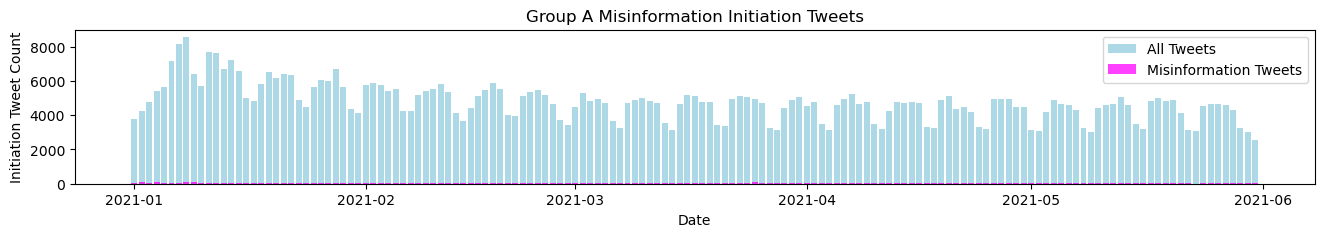

In [6]:
#this cell is looking at Group A fake initiation tweets, where the users tweeted a link to a fake news domain
#filter dataframe for tweets by ms non-du following only trump
trump_only_df = mccabe_data[(mccabe_data['group'] == "A")].copy()
trump_only_totals = trump_only_df[(trump_only_df["stat"] == "total")].copy()
trump_only_totals_2021= trump_only_totals[trump_only_totals.date >= "2021-01-01"]

#figure size
plt.figure(figsize=(16, 2))

#plot date on the x axis, and n (total number of tweets) on the y axis
plt.bar(trump_only_totals_2021.date, trump_only_totals_2021.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation tweets (the fake_merged_initiation variable) in a different color
plt.bar(
    trump_only_totals_2021.date,
    trump_only_totals_2021.fake_merged_initiation,
    color='magenta',
    alpha=0.75,
    label="Misinformation Tweets"
)
plt.title("Group A Misinformation Initiation Tweets")
plt.xlabel("Date")
plt.ylabel("Initiation Tweet Count")
plt.legend()

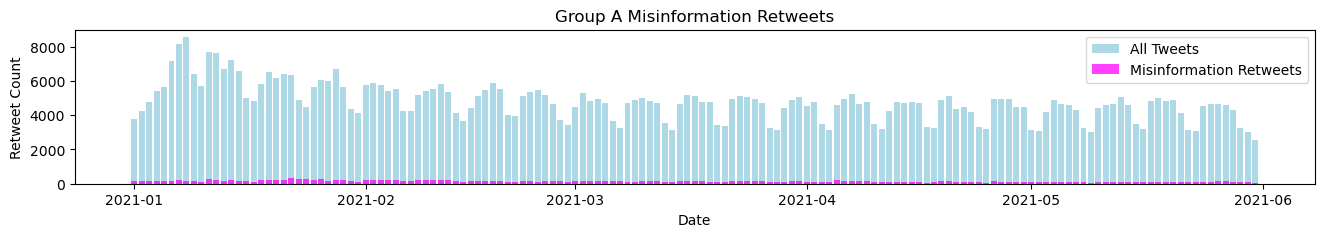

In [7]:
#filter df for trump only followers in group A
#this cell is looking at their fake retweets
trump_only_df = mccabe_data[(mccabe_data['group'] == "A")].copy()
trump_only_totals = trump_only_df[(trump_only_df["stat"] == "total")].copy()
trump_only_totals_2021= trump_only_totals[trump_only_totals.date >= "2021-01-01"]

#figure size
plt.figure(figsize=(16, 2))

#plot date on the x axis, and n (total number of tweets) on the y axis
plt.bar(trump_only_totals_2021.date, trump_only_totals_2021.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation retweets (the fake_merged_rt variable) in a different color
plt.bar(
    trump_only_totals_2021.date,
    trump_only_totals_2021.fake_merged_rt,
    color='magenta',
    alpha=0.75, 
    label="Misinformation Retweets"
)
plt.title("Group A Misinformation Retweets")
plt.xlabel("Date")
plt.ylabel("Retweet Count")
plt.legend()

**The fake_merged_initiation Tweet count for users in Group A is consistently closer to zero from January 2021 to June 2021, and barely visible on the plot. It is lower than the count of misinformation retweets shown on the second plot. This shows that Group A users did not initiate very many tweets containing links to domains marked as misinformation, but that they did exhibit comparatively higher misinformation sharing behavior when retweeting tweets containing links to misinformation. This number seems to taper off after March 2021, and is highest around mid-January 2021 through mid-February 2021. That is interesting, considering the deplatforming intervention took place from January 8, 2021 to January 12, 2021. A possible reason for this discrepancy is that users in Group A may not initiate a lot of their own tweets to begin with, and engage by retweeting content from others. If there were non-deplatformed users sharing misinformation that came on users' timelines, they may have retweeted that, highlighting how misinformation can still circulate after major disseminators are deplatformed. There are also various reasons why people may have followed Trump to begin with, and this group could be split between people who followed him because he was President and people who followed him because they supported him. With a lack of context for the type of misinformation shared during this time, and lack of information about individual users, it is hard to speculate whether that spike is due to a specific type of misinformation or reason for following Trump.**

### Group B

**The two cells below show the share of fake_merged_initiation and fake_merged_rt tweets for users in Group B. Users in Group B followed at least one deplatformed user, which can include or exclude Trump.**

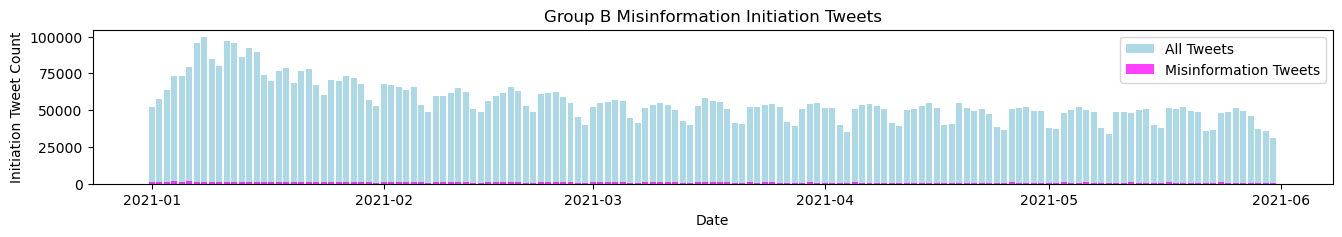

In [8]:
#group B fake_merged_initiation
#looking at tweets where a user tweeted a link to a misinformation domain

#count tweets by ms non-du following trump or at least one other deplatformed user
one_plus_du = mccabe_data[(mccabe_data['group'] == "B")].copy()
one_plus_du = one_plus_du[(one_plus_du["stat"] == "total")].copy()
one_plus_du_totals= one_plus_du[one_plus_du.date >= "2021-01-01"]

#figure size
plt.figure(figsize=(16, 2))

#plot
plt.bar(one_plus_du_totals.date, one_plus_du_totals.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation tweets (the fake_merged_initiation variable) in a different color
plt.bar(
   one_plus_du_totals.date,
   one_plus_du_totals.fake_merged_initiation,
    color='magenta',
    alpha=0.75, 
    label="Misinformation Tweets"
)
plt.title("Group B Misinformation Initiation Tweets")
plt.xlabel("Date")
plt.ylabel("Initiation Tweet Count")
plt.legend()

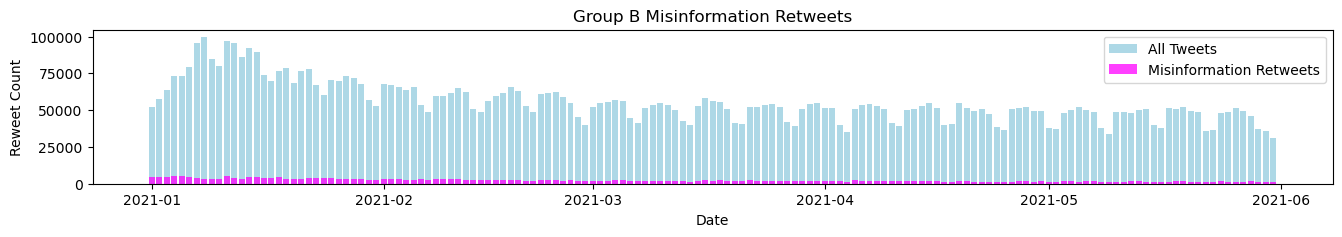

In [9]:
#looking at misinformation retweets for group B
#filter by ms non-du following trump or one other deplatformed user
one_plus_du = mccabe_data[(mccabe_data['group'] == "B")].copy()
one_plus_du = one_plus_du[(one_plus_du["stat"] == "total")].copy()
one_plus_du_totals= one_plus_du[one_plus_du.date >= "2021-01-01"]


plt.figure(figsize=(16, 2))

plt.bar(one_plus_du_totals.date, one_plus_du_totals.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation retweets (the fake_merged_rt variable) in a different color
plt.bar(
   one_plus_du_totals.date,
   one_plus_du_totals.fake_merged_rt,
    color='magenta',
    alpha=0.75, 
    label="Misinformation Retweets"
)
plt.title("Group B Misinformation Retweets")
plt.xlabel("Date")
plt.ylabel("Reweet Count")
plt.legend()

**The fake_merged_initiation Tweet counts for Group B are relatively low but higher than those for Group A, as observed from the plots. This suggests that while both groups have low initiation activity related to fake news, Group B shows a higher tendency to initiate misinformation tweets (the scale of the y-axis on this plot is larger than for Group A). The fake_merged_rt retweet counts for Group B are significantly higher than those for Group A, and also higher than the initiated tweets within Group B. This indicates that users in Group B are more likely to engage in amplifying fake news through retweets rather than initiating original posts. The retweet activity in Group B remains relatively high from January 1, 2021, through the end of the month, with a gradual tapering off from mid-February 2021 to June 2021.**

**There is apparent overlap between Group A and other subgroups (Group D). Group B is broader than Group A because it includes Group A users (Trump followers) and other users who follow at least one other deplatformed users (at least one implying that it also includes Group D). This is also indicated by the larger scale of the y-axis on the plot, which goes up to 100000 tweets as opposed to the scale going up to 8000 for Group A.**

**The sustained higher volume of retweets after the intervention could suggest that users in Group B are more susceptible to spreading content once it has been introduced into their network, even if there is less misinformation initiation. This could imply that the deplatforming had a limited impact on curbing the spread of existing misinformation, as it continued to be shared by these users even when fewer original tweets were being initiated. The persistence of retweet activity could indicate a network effect, where content continues to circulate within certain communities even after its initial creation has slowed down, which could show that it is hard to stop the spread of misinformation by deplatforming certain individuals once it has taken root within a network of users on Twitter. It could also be that the high retweet count is from sharing in a broader network rather than a single group of users, given the overlap.**

### Group D

**The two cells below show the fake_merged_initiation and fake_merged_rt for Group D. Group D users followed at least four deplatformed accounts, which can include Trump or not.**

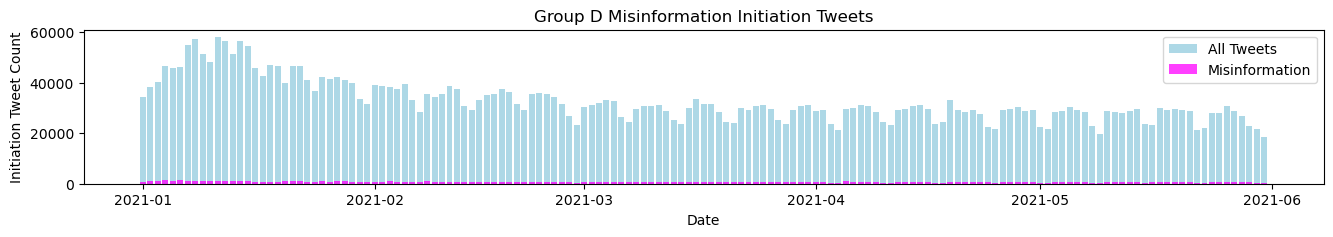

In [10]:
#looking at the fake merged initiation tweets for group D
#count tweets by misinfo sharing (ms), non-deplatformed users (du) following 4+ du accounts
four_du_f = mccabe_data[(mccabe_data['group'] == "D")].copy()

four_du_totals = four_du_f[(four_du_f["stat"] == "total")].copy()

#look at only 2021 tweets
four_du_totals_2021= four_du_totals[four_du_totals.date >= "2021-01-01"]

#set figure size
plt.figure(figsize=(16, 2))

#plot, put the date on the x axis, and n (total number of tweets) on the y axis
plt.bar(four_du_totals_2021.date, four_du_totals_2021.n, color='lightblue', label="All Tweets")

#overlay a count of the intitiation of misinformation tweets (the fake_merged_initiation variable) in a different color
#label axes
plt.bar(
    four_du_totals_2021.date,
    four_du_totals_2021.fake_merged_initiation,
    color='magenta',
    alpha=0.75, 
    label="Misinformation" 
)
plt.title("Group D Misinformation Initiation Tweets")
plt.xlabel("Date")
plt.ylabel("Initiation Tweet Count")
plt.legend()

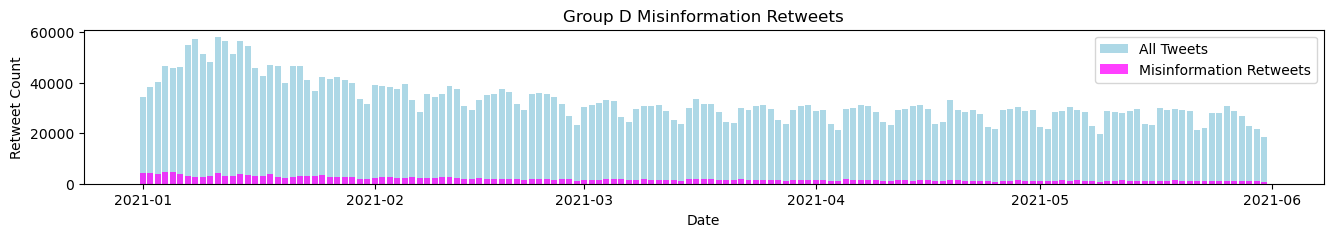

In [11]:
#looking at the fake retweets for group D
#filter the dataframe for group D, isolate for 2021 
four_du_f = mccabe_data[(mccabe_data['group'] == "D")].copy()
four_du_totals = four_du_f[(four_du_f["stat"] == "total")].copy()
four_du_totals_2021= four_du_totals[four_du_totals.date >= "2021-01-01"]

#set figure size
plt.figure(figsize=(16, 2))

#plot figure, date on the x-axis and y is total tweets 
plt.bar(four_du_totals_2021.date, four_du_totals_2021.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation retweets (the fake_merged_rt variable) in a different color
#label axes
plt.bar(
    four_du_totals_2021.date,
    four_du_totals_2021.fake_merged_rt,
    color='magenta',
    alpha=0.75, 
    label="Misinformation Retweets" 
)
plt.title("Group D Misinformation Retweets")
plt.xlabel("Date")
plt.ylabel("Retweet Count")
plt.legend()

**Group D does not overlap with Group A, but it does overlap with Group B. Group D has relatively similar (low) misinformation initiation levels compared to Groups A and B, which may indicate that users in Group D are not actively generating new fake information. Like Groups A and B, misinformation initiation activity in Group D shows as slightly higher around January 2021, which is probably tied to January 6th, but returns to consistently low levels thereafter. This consistency in low initiation activity across all groups suggests that the act of creating new misinformation content is not highly prevalent among any of the groups, with increases around political events being the primary influence on initiated misinformation tweets.**

**The higher share of misinformation retweets within Group D, compared to its lower levels of misinformation initiation, suggests that retweet activity plays a far more prominent role in spreading misinformation among these users. When isolating for the effect of following more deplatformed users, it becomes evident that Group D's retweet behavior is influenced by their connection to a network of accounts that have been removed from Twitter. This likely results in a the continuing circulation of misinformation within their network, even after the original initiators of misinformation have been deplatformed from Twitter.**

**Users in Group D follow more deplatformed users and may be more likely to come across misinformation via retweets from users who may have interacted with these accounts prior to deplatforming. This suggests that the removal of deplatformed users might not fully end dissemination of misinformation and can instead continue, albeit at lower levels.**

**The fact that Group D continues to engage in retweeting misinformation implies that deplatforming interventions may have limited immediate effect on reducing the overall spread of misinformation.**

### Group F

**Group F consists of misinformation sharers who do not follow any deplatformed users. The following plots show the misinformation initiation and misinformation retweets for this group.**

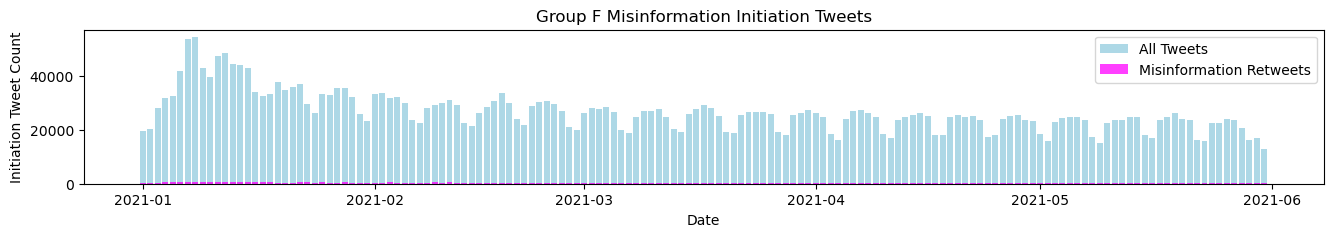

In [12]:
#looking at misinformation initiation tweets for Group F
#filter tweets by group F in 2021
no_du = mccabe_data[(mccabe_data['group'] == "F")].copy()
no_du = no_du[(no_du["stat"] == "total")].copy()
no_du = no_du[no_du.date >= "2021-01-01"]

plt.figure(figsize=(16, 2))

plt.bar(no_du.date, no_du.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation tweets (the fake_merged_initiation variable) in a different color
plt.bar(
   no_du.date,
   no_du.fake_merged_rt,
    color='magenta',
    alpha=0.75, 
    label="Misinformation Retweets" 
)
plt.title("Group F Misinformation Initiation Tweets")
plt.xlabel("Date")
plt.ylabel("Initiation Tweet Count")
plt.legend()

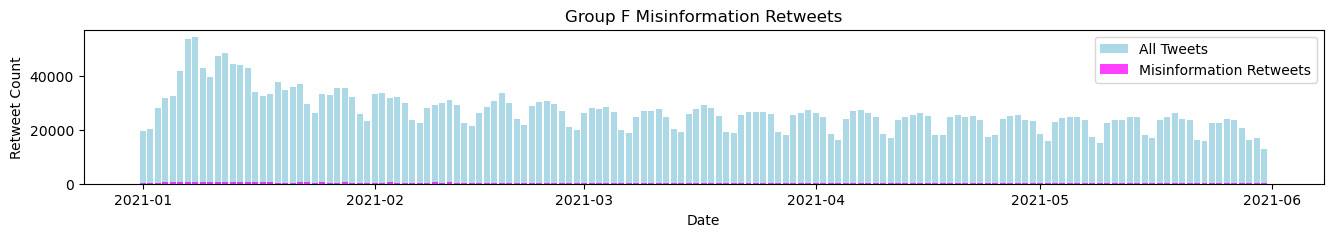

In [13]:
#looking at misinformation retweets for Group F
#filter tweets by group F in 2021
no_du = mccabe_data[(mccabe_data['group'] == "F")].copy()
no_du = no_du[(no_du["stat"] == "total")].copy()
no_du = no_du[no_du.date >= "2021-01-01"]

plt.figure(figsize=(16, 2))

plt.bar(no_du.date, no_du.n, color='lightblue', label="All Tweets")

#overlay a count of the misinformation retweets (the fake_merged_rt variable) in a different color
plt.bar(
   no_du.date,
   no_du.fake_merged_rt,
    color='magenta',
    alpha=0.75, 
    label="Misinformation Retweets" 
)
plt.title("Group F Misinformation Retweets")
plt.xlabel("Date")
plt.ylabel("Retweet Count")
plt.legend()

**Compared to groups A, B, and D, which all consist of followers of deplatformed users, Group F has a high number of overall tweets but very low numbers of misinformation initiation and misinformation retweets. They have near zero for both initation and retweets, with slightly higher amounts around January 2021. This could again be the result of January 6th and the high political tensions and visibility at that time, even without following deplatformed users. The return to near-zero levels after January implies they may have a general lack of engagement with misinformation spreaders on Twitter.**

**The contrast in Group F's behavior suggests that while these users are active on Twitter, they are not really involved in the spread of misinformation, especially with respect to fake news from deplatformed users. This could indicate that the networks they are situated in on Twitter may expose them to fewer sources of misinformation overall.**

### Comparative Plots

**To account for the fact that the y-axes of the bar charts were not standardized, I produced the following comparative plots below, to draw more solid comparisons between the four subgroups.**

Text(0, 0.5, 'fake initiation tweet count')

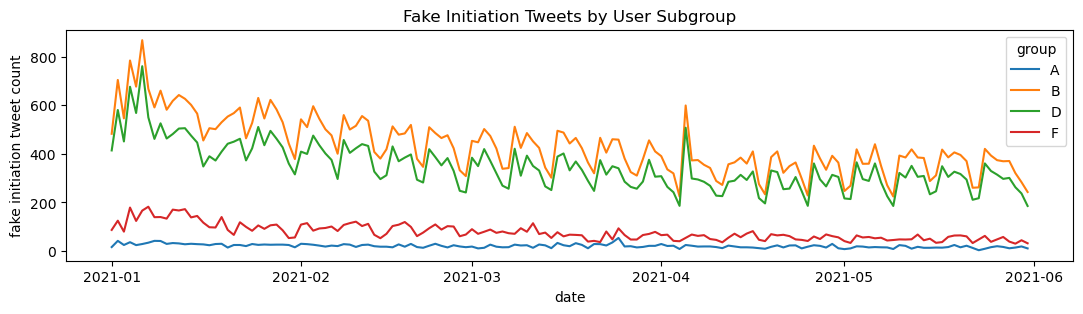

In [14]:
#create a dataframe of just the subgroups A, B, D, F
subgroup_df = mccabe_data[mccabe_data['group'].isin(['A', 'B', 'D', 'F'])]
subgroup_df = subgroup_df[subgroup_df.date >= "2021-01-01"]

#plot their fake initiation tweets against each other for the year 2021
plt.figure(figsize=(13,3))
sns.lineplot(data=subgroup_df, x='date', y="fake_merged_initiation", hue="group", errorbar=None).set_title('Fake Initiation Tweets by User Subgroup')
plt.ylabel('fake initiation tweet count')

Text(0, 0.5, 'fake retweet count')

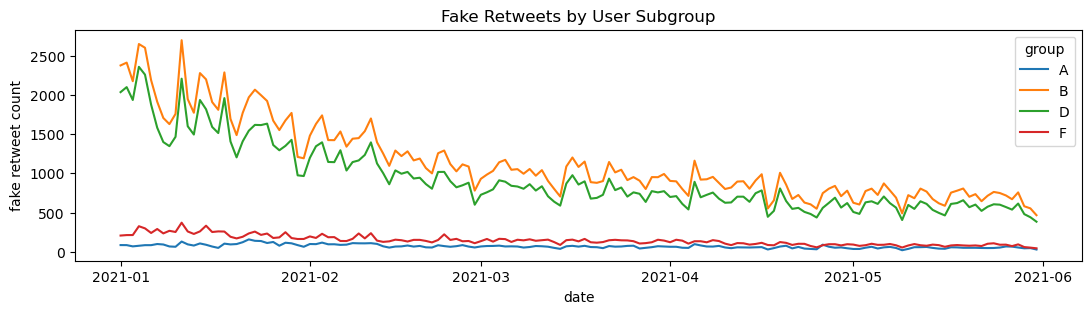

In [15]:
#do the same for retweets by user subgroup
plt.figure(figsize=(13,3))
sns.lineplot(data=subgroup_df, x='date', y="fake_merged_rt", hue="group", errorbar=None).set_title('Fake Retweets by User Subgroup')
plt.ylabel('fake retweet count')

**Group A maintains the lowest levels of fake initiation tweets, with a slight increase around January 2021. This makes sense given that there may be various reasons they followed Donald Trump, and that there could be many different types of ideological users in this group. They may also have minimal exposure or participation in the spread of and initiation of misinformation. Group F also has near-zero levels of fake initiation tweets which is consistent with their status as the group that does not follow deplatformed users, but since it is higher than Group A, it could indicate something about this group that leads to more misinformation sharing through tweets and retweets. Groups B and D have a similar, parallel pattern in the initiation of misinformation tweets. THe both spike around early January 2021, and although they both decrease overall, they still have spikes in misinformation initiation sharing behavior, and are comparatively much higher in tweet count than Groups A and F. The parallel pattern is likely due to the overlap in users between Groups B and D, and B appears to have higher counts than D because it includes a higher count of users from both Group A and Group D.**

**Group F has low misinformation retweet activity, and it is lower than their misinformation initiation activity (as seen earlier as well). Group A has very low, near-zero retweet activity relative to the other groups on the plot. Groups B and D again exhibit parallel retweet behavior because of their overlap. Both have spikes and then a dip around the deplatforming intervention period. This is likely because they were exposed to a high amount of deplatformed users, and thus had less content to retweet during the deplatforming intervention. Especially because Group D has higher exposure to deplatformed users, it could be skewing the data from Group B. It spiked again after to similar levels as the beginning of January, before decreasing by June 2021. Even though the original sources of misinformation were not active for users in these groups, their networks likely remained active in the dissemination of misinformation.**

---

# **Section 3** Replication of Main DiD Results
**In this section, you will perform at least one Difference in Differences analysis with the goal of conceptually replicating the key DiD analysis that McCabe et al performed to support their primary conclusion.**

**In the original paper, the conclusion was that followers of deplatformed accounts decreased their retweets of misinformation, and that non-followers were not as affected by the intervention.**

**In the two cells below, I am importing libraries and creating a dataframe where I define the treatment and control groups. I used A, B, and D as the treatment groups, because they are all misinformation sharers and followers of deplatformed individuals. These groups will allow me to observe how deplatforming impacts the behavior of followers with respect to spreading misinformation on Twitter.**

**I chose Group F as the control, because despite being information sharers, they do not follow deplatformed users. This split makes the most sense to make a comparison between users following deplatformed users and those who do not. By choosing these groupings, I can more effectively evaluate whether deplatforming specific sources of misinformation had an effect on the spread of misinformation on Twitter through initiation and retweets.**



In [16]:
#import libraries 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.preprocessing

In [17]:
#set the pre_treatment dates as Dec 1, 2020 through Jan 6, 2021 per the methods section of McCabe et al. 
pre_treatment_dates = ('2020-12-01', '2021-01-06')

#set the post_treatment dates as Jan 12, 2021 through Jan 29, 2021 per the methods section of McCabe et al.
post_treatment_dates = ('2021-01-12', '2021-01-29')

#define the groups to be used
#a,b,d are the treatment groups since they follow deplatformed users
#f is the control since they do not follow any deplatformed users
grps = ['A', 'B', 'D', 'F'] 

#create a df
did_data = mccabe_data[
    (((mccabe_data['date'] >= pre_treatment_dates[0]) & (mccabe_data['date'] <= pre_treatment_dates[1])) |
     ((mccabe_data['date'] >= post_treatment_dates[0]) & (mccabe_data['date'] <= post_treatment_dates[1])))
]

did_data = did_data[(did_data['stat'] == 'total') & (did_data['group'].isin(grps))]

#define the treatment date
treatment_date = '2021-01-12'

#encode the variables
did_data['post_treatment'] = (did_data['date'] >= treatment_date).astype(int)

#dummy variables
did_data['treatment_group'] = did_data['group'].isin(['A', 'B', 'D']).astype(int)

### DiD: fake_merged

**The first DiD analysis is in the cell below. 'fake_merged' is the dependent variable that shows the total counts of fake retweets and initiation tweets, since I want to measure how much (overall) misinformation users share.**

**'post_treatment' has values 0 (before deplatforming intervention) and 1 (after deplatforming intervention); it captures changes in misinformation sharing after the deplatforming intervention for the treatment and control groups. 'treatment_group' is 0 (control, Group F) and 1 (treatment, Groups A, B, and D) to distinguish between followers and non-followers of deplatformed users. The interaction term is 'post_treatment*treatment_group' which shows how much the treatment_group's misinformation sharing behavior changed after the deplatforming intervention, relative to the control group, by isolating the effect of Twitter's deplatforming intervention.**

**H0: There is no difference between the treatment and control groups in misinformation sharing behavior after the deplatforming intervention.**

**Ha: There is a reduction in misinformation sharing through tweets and retweets in the treatment group compared to the control group after the deplatforming intervention.**

In [18]:
#look at fake_merged tweets overall (initiation + rt) for the control and treatment group 
formula = 'fake_merged ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            fake_merged   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     26.22
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.67e-14
Time:                        14:40:15   Log-Likelihood:                -2014.3
No. Observations:                 220   AIC:                             4037.
Df Residuals:                     216   BIC:                             4050.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**The coefficient we are interested in to show whether the deplatforming intervention had any effect is the coefficient for the interaction term post_treatment:treatment_group. The coefficient is -1023.2102, which indicates that on average, the treatment_group reduced their misinformation tweets by about 1,023 after deplatforming compared to the treatment group. But, the p-value is not significant at 0.184, which is greater than alpha = 0.05. So, there is not strong enough evidence to conclude that deplatforming had a statistically significant effect. We fail to reject the null hypothesis that there is no difference in misinformation sharing behavior between the treatment and control groups after the deplatforming intervention. The lack of statistical significance could indicate that there are other confounding factors that caused the reduction in tweets, such as migration from Twitter to other platforms or continued circulation of misinformation within subgroups.**

### DiD: fake_merged_rt

**The conclusion of the paper was that the number of *retweets* specifically decreased among followers of deplatformed users. The DiD analysis below aims to test that, with the dependent variable in the formula set to 'fake_merged_rt'. All other parts of the formula are the same as the prior.**

**H0: There is no difference between the treatment and control groups in misinformation retweet sharing behavior after the deplatforming intervention.** 

**Ha: There is a reduction in misinformation sharing through retweets in the treatment group compared to the control group after the deplatforming intervention.**

In [19]:
#run the same DiD but this time, just on retweets
formula = 'fake_merged_rt ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     27.87
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.83e-15
Time:                        14:40:15   Log-Likelihood:                -1961.0
No. Observations:                 220   AIC:                             3930.
Df Residuals:                     216   BIC:                             3943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**The coefficient for the interaction term is -844.7823, which implies that on average, the treatment group showed a reduction of about 844 fewer retweets of misinformation after the deplatforming intervention compared to the control group. The p-value is not significant though, at 0.162 which is greater than alpha = 0.05. Therefore, we do not have sufficient evidence to conclude that the deplatforming intervention had a statistically signficant effect. We fail to reject the null hypothesis that there is no difference between the treatment and control groups in misinformation retweet sharing behavior after the deplatforming intervention. There could be other factors and variability at play causing the reduction seen in the coefficient for the interaction term, rather than the deplatforming intervention itself.**

### DiD: 'fake_merged_initiation'

**I changed the dependent variable to 'fake_merged_initiation' to see if there was a statistically significant reduction in the number of fake initiated tweets in the treatment group compared to the control group as an effect of the deplatforming intervention.**

**H0: There is no difference between the treatment and control groups in misinformation initiation tweet sharing behavior after the deplatforming intervention.**

**Ha: There is a reduction in misinformation sharing through initiating a tweet in the treatment group compared to the control group after the deplatforming intervention.** 

In [20]:
#run the same DiD but this time, just on initiation
formula = 'fake_merged_initiation ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     fake_merged_initiation   R-squared:                       0.214
Model:                                OLS   Adj. R-squared:                  0.203
Method:                     Least Squares   F-statistic:                     19.56
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):           2.95e-11
Time:                            14:40:15   Log-Likelihood:                -1682.2
No. Observations:                     220   AIC:                             3372.
Df Residuals:                         216   BIC:                             3386.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

**The coefficient for the interaction term here is smaller than that of the fake_merged and fake_merged_rt DiD analyses. It shows on average a decrease of 178 initiated misinformation tweets in the treatment group compared to the control group. This makes sense, since the highest coefficient was for the combined tweets and rts, and rts seemed to make up a higher share of misinformation shared across groups from the exploratory analysis. The p-value is 0.294, which is greater than alpha = 0.05, so the result is not statistically significant. Therefore we fail to reject the null hypothesis that there is no difference between the treatment and control groups in misinformation initiation tweet sharing behavior after the deplatforming intervention.**


### DiD: Only using Group B as 'treatment_group'

**My goal is to recreate the results of the DiD in the original paper. I was curious to see why I wasn't getting statistically signficant results in the prior analyses. Because there is significant overlap between the user subgroups, I decided to also run a DiD where I used the broadest deplatformed user follower group, Group B, as the treatment group. Group F was kept as the control group. I believe that Groups A and D may have diluted the effect of deplatforming on users' misinformation sharing by creating redundant data points.**

**Below I run the same DiDs as I did above with the above changes made to the groups. I recreated a dataframe to use for the analysis.**

In [21]:
#set the pre_treatment dates as Dec 1, 2020 through Jan 6, 2021 per the methods section of McCabe et al. 
pre_treatment_dates = ('2020-12-01', '2021-01-06')

#set the post_treatment dates as Jan 12, 2021 through Jan 29, 2021 per the methods section of McCabe et al.
post_treatment_dates = ('2021-01-12', '2021-01-29')

#define the groups to be used
#b is the treatment group since follow deplatformed users, broadest user group
#f is the control since they do not follow any deplatformed users
grps = ['B', 'F'] 

#create a df
did_data = mccabe_data[
    (((mccabe_data['date'] >= pre_treatment_dates[0]) & (mccabe_data['date'] <= pre_treatment_dates[1])) |
     ((mccabe_data['date'] >= post_treatment_dates[0]) & (mccabe_data['date'] <= post_treatment_dates[1])))
]

#encode the variables
did_data = did_data[(did_data['stat'] == 'total') & (did_data['group'].isin(grps))]

treatment_date = '2021-01-12'
did_data['post_treatment'] = (did_data['date'] >= treatment_date).astype(int)

#dummy variables
did_data['treatment_group'] = did_data['group'].isin(['B']).astype(int)

### DiD: 'fake_merged'

**Here, 'fake_merged' is the dependent variable. I am going to use the same null and alternative hypotheses from the previous section where I used 'fake_merged' as the dependent variable.**

In [22]:
#DiD with B as treatment, F as control, fake_merged as dependent variable.
formula = 'fake_merged ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            fake_merged   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     455.8
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.09e-60
Time:                        14:40:15   Log-Likelihood:                -882.74
No. Observations:                 110   AIC:                             1773.
Df Residuals:                     106   BIC:                             1784.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**The coefficient for the interaction term in this DiD analysis is about -1526, which shows that there was on average a decrease of about 1,526 overall tweets and retweets of misinformation in the treatment group (Group B). The p-value is less than alpha = 0.05, which means that the result is statistically significant. We reject the null hypothesis that there is no difference between the treatment and control groups in misinformation sharing behavior after the deplatforming intervention.**

**However, I am still curious as to whether the decrease is mostly as a result of a reduction in misinformation initiation tweets or retweets.**

### DiD: 'fake_merged_initiation'

**I am only looking at initiation of misinformation tweets in this analysis, and the same hypotheses from the analysis with a larger treatment group apply.**

In [23]:
#DiD with B as treatment, with fake_merged_initiation as the dependent variable
formula = 'fake_merged_initiation ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     fake_merged_initiation   R-squared:                       0.893
Model:                                OLS   Adj. R-squared:                  0.890
Method:                     Least Squares   F-statistic:                     294.0
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):           3.28e-51
Time:                            14:40:15   Log-Likelihood:                -732.83
No. Observations:                     110   AIC:                             1474.
Df Residuals:                         106   BIC:                             1484.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

**The coefficient for the interaction term is about -272, showing a reduction on average in misinformation tweets for the treatment group compared to the control group, after the deplatforming intervention. This is a much smaller reduction than looking at both retweets and tweets together as a dependent variable. The p-value/alpha is 0.001, which is statistically significant as alpha is less than 0.05. Thus, we fail to reject the null hypothesis that there is no difference between the treatment and control groups in misinformation initiation tweet sharing behavior after the deplatforming intervention.**

### DiD: 'fake_merged_rt'

**This DiD analysis is to show whether there is a statistically significant reduction in fake retweets from followers of deplatformed users when compared to non-followers after the deplatforming intervention. The null hypothesis and alternative hypothesis are the same as in the previous section.**

In [24]:
#DiD with B as treatment group, looking at retweets
formula = 'fake_merged_rt ~ post_treatment + treatment_group + post_treatment*treatment_group'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     445.6
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           6.34e-60
Time:                        14:40:15   Log-Likelihood:                -858.68
No. Observations:                 110   AIC:                             1725.
Df Residuals:                     106   BIC:                             1736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**The coefficient for the interaction term is about -1254, which shows that on average, there were 1,254 less misinformation retweets for the treatment group when compared to the control group, after isolating for the effect of the deplatforming intervention. This coefficient is higher than the coefficient for the interaction term in the DiD analysis where the dependent variable was solely misinformation initiation tweets, suggesting that retweets are the biggest driver of overall reduction in misinformation tweets. The results of this DiD are also statistically significant, as the p-value for the interaction term is less than 0.05. Thus, we fail to reject the null hypothesis that there is no difference between the treatment and control groups in misinformation retweet sharing behavior after the deplatforming intervention.**

### Section 3: Conclusion

**After conducting the DiD analyses above, my results became statistically significant when using only Group B as the treatment group. This suggests that the overlap between the three groups influenced the robustness of the DiD analysis. By isolating for only Group B in the second part of my DiD analyses, I removed some of the potential noise in the data caused by the overlap, and allowed the DiD to better pick up on the effect of the deplatforming intervention on the treatment group. The DiD analysis works better when the groups are distinct and clearly defined, and when there are not broadly different levels of exposure to deplatformed users among members of the treatment group or overlap, it obscures the results less.** 

**Group B is the broadest group of users all exposed to at least one deplatformed user, and the statistical significance of the results suggests that this group was affected by the deplatforming intervention. They likely had sources of misinformation to retweet removed from their Twitter networks due to the deplatforming interventions, since some amount of the users followed four or more deplatformed users. The statistical signficance of initiation tweets as well, could indicate migration from the platform or a lack of use of the platform because of the deplatforming of people they followed. A further analysis to test this could be looking specifically at high activity users in group B.**

**Statistically significant results for only Group B as a treatment group, and not A and D may indicate that those groups may behave differently that the broader cohort of users. These other groups of users may have just found different sources of misinformation which could reduce the effect of removing certain individual accounts. Group D in particular is a subset of users who follow four or more deplatformed users, and likely have higher levels of engagement with those accounts, which could imply they are already embedded in social networks on Twitter that spread misinformation regardless of if anyone was deplatformed, making them less susceptible to the intended effects of the deplatforming intervention. User level data and other behavioral or political aspects of these groups could give more insight into why their behavior leads to statistical insignificance when combined with Group B, and allow us to draw more solid conclusions about them.**

---

# **Section 4** Extensions and follow up analyses
In this section, you will perform follow-up analyses, summaries, or visualizations that you feel help shed light on the robustness of the conclusion reached by McCabe et al. You are welcome to draw on insights you gained through data simulation, and to draw on the questions we discussed in class surrounding the **key assumptions and study decisions** in [Notebook 1: Data Acquisition](https://github.com/ccs-ucb/CSS1A/blob/main/notebooks/notebook-1-data-acquisition.ipynb).

### Further DiD Analysis to assess how deplatforming affects users with different activity levels

**In the previous section, I remarked on how examining high-activity users in Group B could reveal whether the deplatforming intervention impacted them differently (by causing a reduction in misinformation tweets overall) compared to users with lower levels of activity. This could be possible given that Group B includes users following at least one (Group A) and over four (Group D) deplatformed users. If you are a high-activity user who followed at least four deplatformed accounts, a significant portion of your misinformation-sharing network may have been disrupted as a result of the deplatforming intervention.**

**I chose to focus on Group B because it encompasses a broad swath of followers of deplatformed users, unlike Group A and Group D, which are more narrowly defined. Group B yielded statistically significant results in my previous DiD analysis, which suggests that the deplatforming intervention had an effect on them.**

**To try to avoid multicollinearity issues, I am encoding high-activity (B_ha) and moderate-activity (B_ma) users in the treatment group, and using low-activity users (B_la) in Group B as the control group. This allows me to isolate how the intervention affected high and moderate activity users relative to low-activity users within Group B.**

In [25]:
#set the pre_treatment dates as Dec 1, 2020 through Jan 6, 2021 per the methods section of McCabe et al. 
pre_treatment_dates = ('2020-12-01', '2021-01-06')

#set the post_treatment dates as Jan 12, 2021 through Jan 29, 2021 per the methods section of McCabe et al.
post_treatment_dates = ('2021-01-12', '2021-01-29')

#define the groups to be used
#b is the treatment group since follow deplatformed users, broadest user group. select by activity level
#f is the control since they do not follow any deplatformed users. select by activity level
grps = ['B_ha', 'B_ma', 'B_la'] 

#create a df
did_data = mccabe_data[
    (((mccabe_data['date'] >= pre_treatment_dates[0]) & (mccabe_data['date'] <= pre_treatment_dates[1])) |
     ((mccabe_data['date'] >= post_treatment_dates[0]) & (mccabe_data['date'] <= post_treatment_dates[1])))
]

#encode the variables
did_data = did_data[(did_data['stat'] == 'total') & (did_data['group'].isin(grps))]

treatment_date = '2021-01-12'
did_data['post_treatment'] = (did_data['date'] >= treatment_date).astype(int)

#dummy variables for group B treatment group
did_data['treatment_group'] = did_data['group'].isin(['B_ha', 'B_ma']).astype(int)

#encode activity levels
did_data['ha'] = did_data['group'].str.endswith('ha').astype(int)
did_data['ma'] = did_data['group'].str.endswith('ma').astype(int)

#define formula with additional interaction terms to see how deplatforming affects different activity levels of users
#include ma and ha but not la so that they are assessed relative to low activity users, also to avoid multicollinearity problems
formula = 'fake_merged ~ post_treatment + treatment_group + post_treatment*treatment_group + ha + ma + post_treatment*ha'
model = smf.ols(formula, data=did_data)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            fake_merged   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     212.2
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.93e-68
Time:                        14:40:15   Log-Likelihood:                -1224.0
No. Observations:                 165   AIC:                             2460.
Df Residuals:                     159   BIC:                             2479.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**Even with using low activity users in Group B as the control and excluding post_treatment:ma and post_treatment:la as interaction terms from my formula, I still run into issues of multicollinearity. With the given data, it is hard to determine the exact effect of the deplatforming intervention when controlling for the effect of the intervention on high activity users. This is because B_ha, B_la, and B_ma are all split off from the original group B and are mutually exclusive. I suppose if the data was collected differently for activity groups it would be possible to avoid multicollinearity issues and be easier to assess the effect of the deplatforming intervention on high activity users. Issues of multicollinearity can lead to less reliable results due to larger standard error, so I cannot rightfully use the analysis above to conclude anything about the deplatforming intervention's effect on high activity users in Group B.**

### Fake and Not Fake Information Sharing Among High and Low Activity Users in Subgroups A, B, D, and F

**Adding interaction terms to my DiD analysis to gauge the effect of deplatforming on high activity group B users did not work, I wanted to explore through t-testing whether there were simply any behavioral differences in sharing among high activity users in each of the subgroups. I chose to look at fake_merged and not_fake for the high activity and low activity subgroups to see if there were statistically significant differences in sharing behavior among the four groups for fake news.**

**I also chose to look at their non-fake information sharing behavior, with respect to political information (defined as not_fake_conservative and not_fake_liberal) to see if this behavior also differed among the four subgroups' high activity and low activity users. This can lead to a better understanding of users in those groups' overall behavior regarding political content on Twitter. It is also useful in assessing if the deplatforming intervention may have had a spillover effect on users' sharing of not fake, politically charged content on Twitter.**

**I first produced visualizations to see if there were any visible patterns in information sharing among the four subgroups' high activity and low activity users.** 

**Then, I conducted t-tests to assess the question of whether there are statistically significant differences in sharing behavior among the groups.**

### Fake_Merged and Not_Fake Tweets Across High Activity User Subgroups

Text(0, 0.5, 'fake_merged total tweet count')

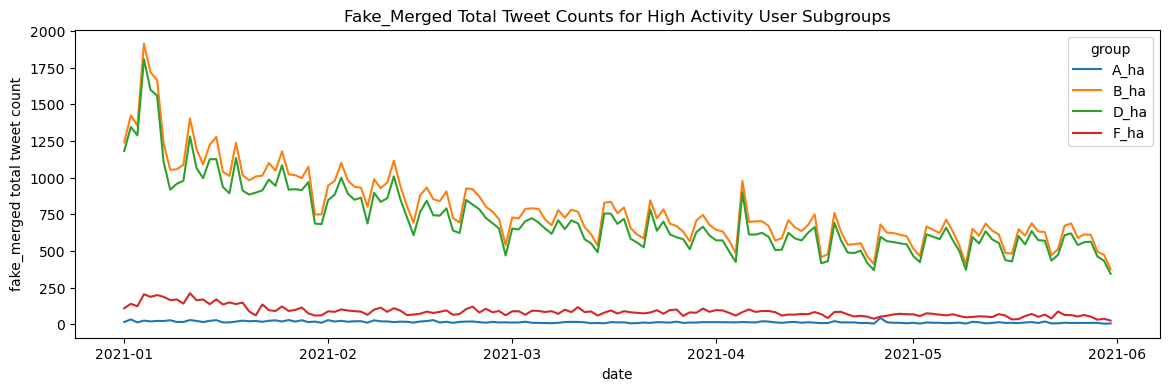

In [26]:
#filter df to just high activity users in the user subgroups
subgroup_df = mccabe_data[mccabe_data['group'].isin(['A_ha', 'B_ha', 'D_ha', 'F_ha'])]

#look at just 2021 to make plot more legible
subgroup_df = subgroup_df[subgroup_df.date >= "2021-01-01"]

#plot the figure to see fake information sharing activity across high activity user subgroups
plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="fake_merged", hue="group", errorbar=None).set_title('Fake_Merged Total Tweet Counts for High Activity User Subgroups')
plt.ylabel('fake_merged total tweet count')

Text(0, 0.5, 'not_fake total tweet count')

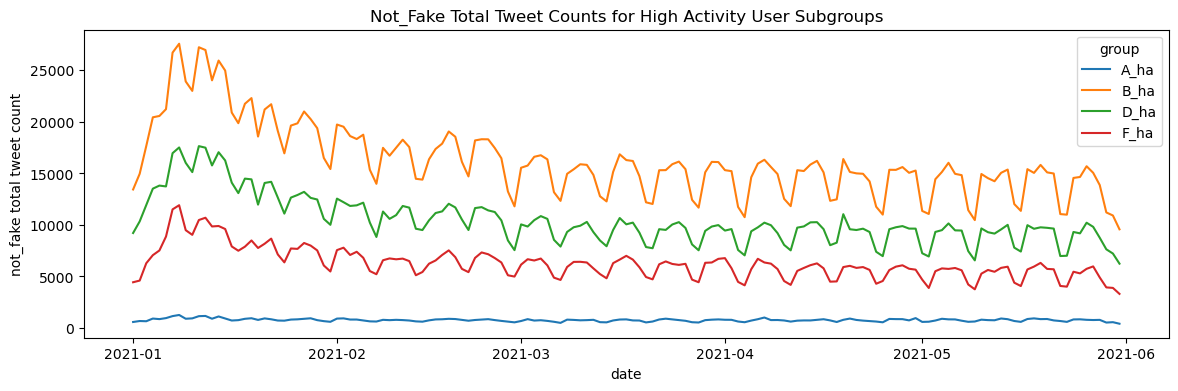

In [27]:
#create the same plot but for not_fake tweets for high activity user subgroups

plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="not_fake", hue="group", errorbar=None).set_title('Not_Fake Total Tweet Counts for High Activity User Subgroups')
plt.ylabel('not_fake total tweet count')

**The plot for fake_merged tweet counts for high activity user subgroups shows that high activity users in groups A and F share lower numbers of misinformation tweets and retweets than users in Groups B and D. Referring back to the overlap problem mentioned earlier, the numbers for high activity Group B and D users track one another and are higher than Groups A and F. They spike around January 2021, at close to 2000 tweets and retweets, and drop dramatically around the deplatforming intervention period. They continue to decline afterwards, though not in a linear fashion. Group F has a small increase around January 2021 before reaching near zero levels, but this could be attributed to being online at a high volume tweet time (prior to and following the deplatforming intervention).**

**The plot for the not_fake total tweet counts shows that Groups F, B, and D track each other, with Group B having the highest amount of not_fake information shared. It is odd that Group F tracks groups B and D, given that they are not followers of deplatformed users and should not overlap with either of those groups. This could indicate either a problem with the dataset or some inherent quality of the users in that group. Around the time of January 6th and the intervention, the sharing activity of the three groups spikes to over 25,000 for Group B, about 17,000 for Group D, and about 12,000 for Group F. This makes sense, given that these are high activity users on Twitter and may engage with a wide variety of information on Twitter, not just limited to political content. These Twitter users may have been more active overall in January given the events going on outside of the platform. Group A on the other hand has close to 0 and consistently low not_fake total tweet counts, even among its high activity users. This could mean that because they primarily relied on Trump for misinformation or followed him for other reasons, they were less exposed to misinformation overall compared to other groups. This could also mean that even their high activity users are not as engaged on the platform as other types of users.**

### Fake Merged and Not Fake Total Tweet Counts for Low Activity User Subgroups

Text(0, 0.5, 'fake_merged total tweet count')

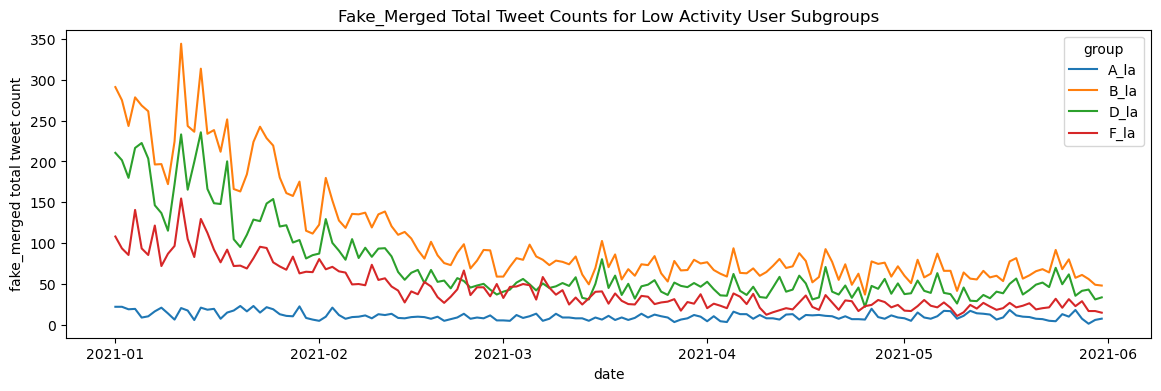

In [28]:
#filter df to just low activity users in the user subgroups
subgroup_df = mccabe_data[mccabe_data['group'].isin(['A_la', 'B_la', 'D_la', 'F_la'])]

#look at just 2021 to make plot more legible
subgroup_df = subgroup_df[subgroup_df.date >= "2021-01-01"]

#plot the figure to see fake information sharing activity across high activity user subgroups
plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="fake_merged", hue="group", errorbar=None).set_title('Fake_Merged Total Tweet Counts for Low Activity User Subgroups')
plt.ylabel('fake_merged total tweet count')

Text(0, 0.5, 'not_fake total tweet count')

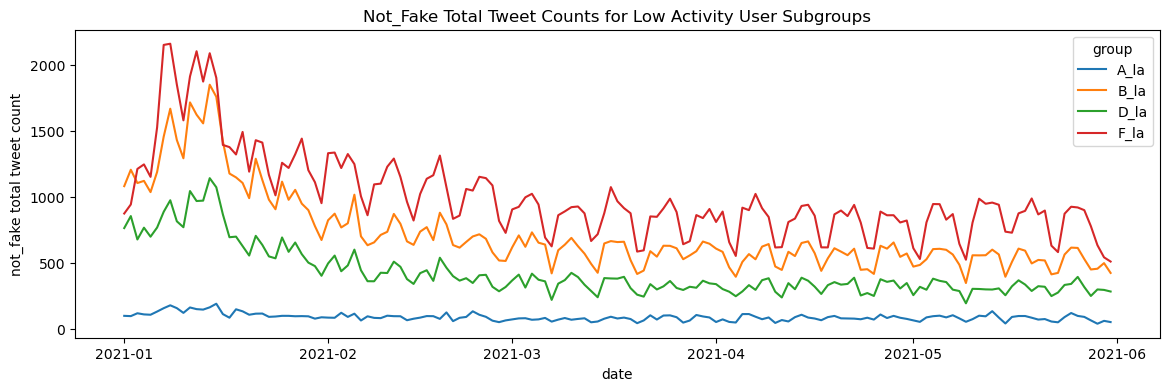

In [29]:
#create the same plot but for low activity users' not fake total tweet counts

plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="not_fake", hue="group", errorbar=None).set_title('Not_Fake Total Tweet Counts for Low Activity User Subgroups')
plt.ylabel('not_fake total tweet count')

**The patterns in the plots above are interesting when compared to the plots for high activity users. For fake_merged (fake retweets and tweets), there is less of a disparity between Groups B and D and Groups A and F. This could also be attributed to the overall numbers and scale of the plot, since the fake_merged scale only goes up to 350, and these low activity users across the four groups may have had similar levels of activity on Twitter. Groups F, B, and D track eachother closely with regard to sharing misinformation, all peaking in January 2021 before decreasing to under 100 tweets of misinformation by mid-March 2021. Group A's low activity users remain consistently low in sharing misinformation on Twitter.**

**In the not_fake tweet counts, low activity users in groups B, D, and F also have parallel patterns. Group F has the highest amount of not fake total tweets, peaking at over 2000 tweets and retweets in January 2021 before falling to around 1000 around March 2021. Group B and D follow (in that order) in terms of highest amounts of not fake total tweets. Group A remains consistently low and closer to 0. Group F is less exposed to deplatformed users because the users in that group do not follow deplatformed users, so that may be why they have the highest number of not_fake total tweets overall.**

### Not Fake Liberal and Conservative Total Tweet Counts for High Activity User Subgroups

Text(0, 0.5, 'not fake liberal total tweet count')

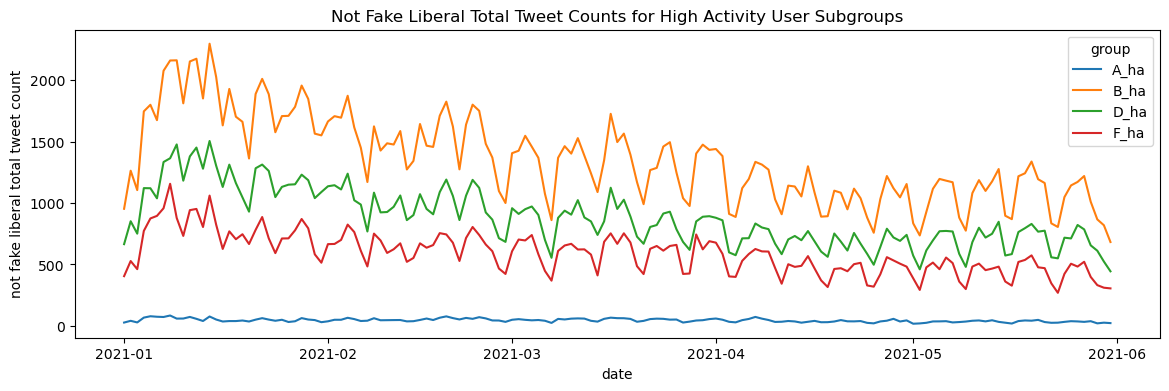

In [30]:
#filter df to just high activity users in the user subgroups
subgroup_df = mccabe_data[mccabe_data['group'].isin(['A_ha', 'B_ha', 'D_ha', 'F_ha'])]
subgroup_df = subgroup_df[subgroup_df.date >= "2021-01-01"]

#plot the figure to see not fake liberal tweet count among the four subgroups
plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="not_fake_liberal", hue="group", errorbar=None).set_title('Not Fake Liberal Total Tweet Counts for High Activity User Subgroups')
plt.ylabel('not fake liberal total tweet count')

Text(0, 0.5, 'not fake conservative total tweet count')

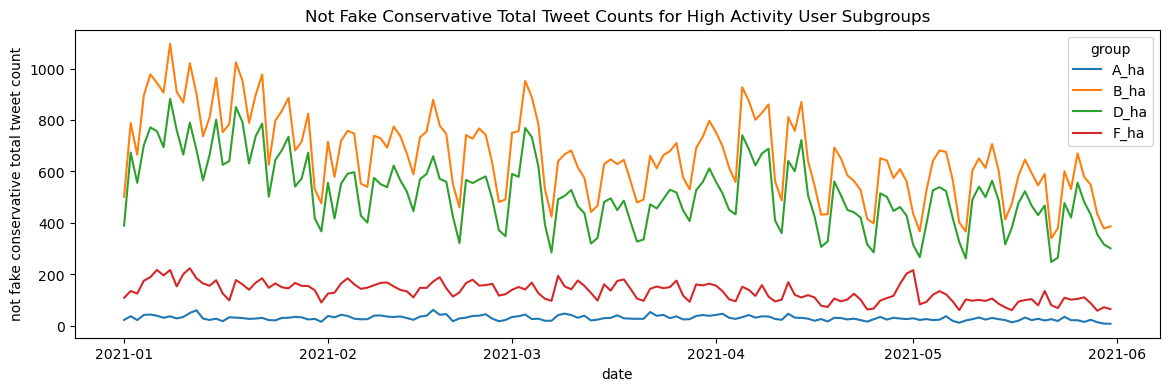

In [31]:
#do the same for not fake conservative tweets across the four subgroups of high activity users

plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="not_fake_conservative", hue="group", errorbar=None).set_title('Not Fake Conservative Total Tweet Counts for High Activity User Subgroups')
plt.ylabel('not fake conservative total tweet count')

**Group B has the highest level of not fake liberal total tweet counts for high activity user subgroups. Group D and F track Group B in a parallel fashion. Because of the overlap, that could be why Group B has the highest amount, peaking at over 2000 in January 2021 before slightly decreasing through to June 2021. Group A has the lowest amount of not fake liberal tweets, and it is pretty similar (close to zero) when compared to their numbers for not fake conservative total tweet counts.**

**Groups B and D have the highest not fake conservative total tweet counts for high activity user subgroups and have parallel patterns. Group D_ha on its own is made up of high activity users that follow four or more deplatformed users. They could have higher levels of conservative tweet counts because they may lean more conservative than other users, or may simply be in more politically engaged circles on Twitter, where this is the content that they consume (however I cannot say this definitively based on the dataset). They peak at around 1000 in January 2021, and have ups and downs close to 1000 and as low as 400 through to June 2021. Group A and F remain consistently lower, with group A being the lowest in sharing not fake conservative tweets. This could indicate (inconclusively) that Group A is not as engaged with political material on Twitter, and that Group F_ha may have higher levels of engagement.**

### Not Fake Conservative and Liberal Total Tweet Counts for Low Activity User Subgroups

Text(0, 0.5, 'not fake conservative total tweet count')

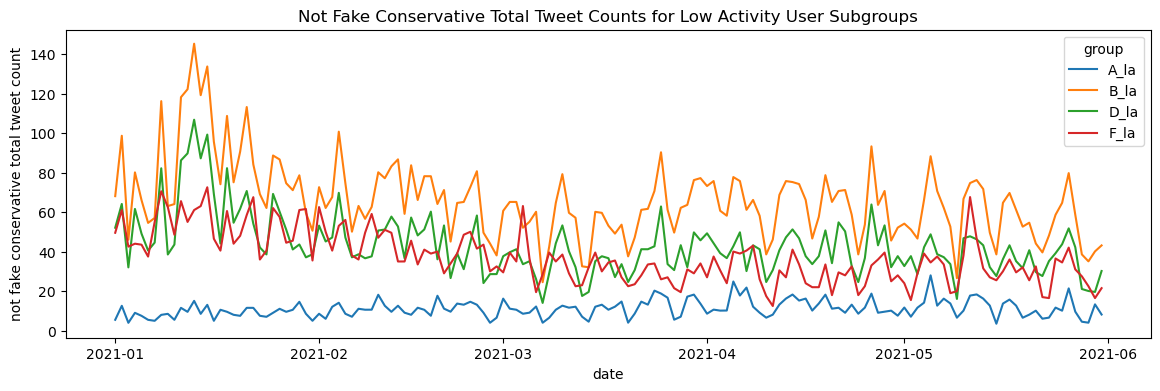

In [32]:
#look at not fake conservative total tweet counts for low activity user subgroups
subgroup_df = mccabe_data[mccabe_data['group'].isin(['A_la', 'B_la', 'D_la', 'F_la'])]
subgroup_df = subgroup_df[subgroup_df.date >= "2021-01-01"]

#plot the figure
plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="not_fake_conservative", hue="group", errorbar=None).set_title('Not Fake Conservative Total Tweet Counts for Low Activity User Subgroups')
plt.ylabel('not fake conservative total tweet count')

Text(0, 0.5, 'not fake liberal total tweet count')

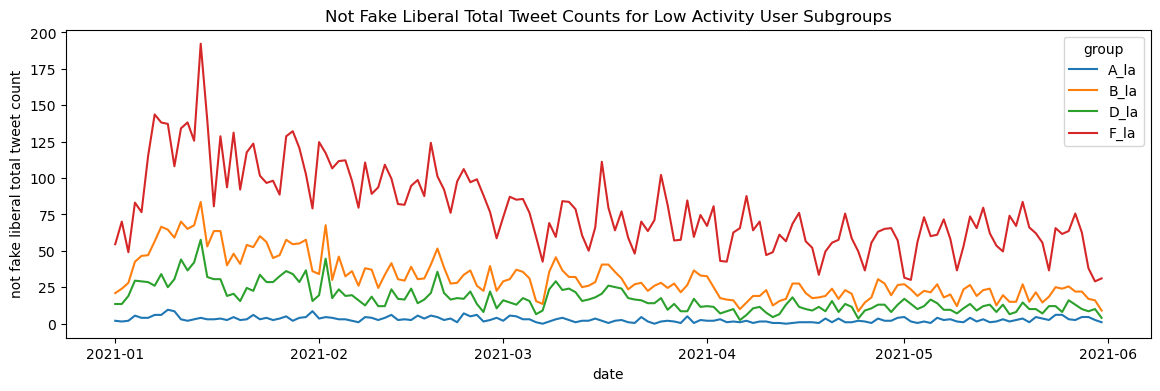

In [33]:
#do the same for the total counts of not fake liberal tweets for low activity user subgroups
plt.figure(figsize=(14,4))
sns.lineplot(data=subgroup_df, x='date', y="not_fake_liberal", hue="group", errorbar=None).set_title('Not Fake Liberal Total Tweet Counts for Low Activity User Subgroups')
plt.ylabel('not fake liberal total tweet count')

**The overall tweet counts for low activity users, as evidenced by the scale of the y-axes, are much lower than that of the high activity users. This is as expected. Group B_la has higher overall tweet counts for not fake conservative tweets. There is significant visual overlap between groups B, D, and F, with F_la exceeding the number of not fake conservative tweets for D_la at various points throughout the 6 month period shown on the plot. This may indicate potential ideological or engagement related factors that affect the sharing behavior of low activity users in the two groups.**

**There is more disparity between the four groups of low activity users for not_fake liberal total tweet counts. Group F has the highest amount of total liberal tweets, and they peak around early January 2021. This could be due to the political events happening at that time. They decrease around mid-January. Because Group F does not follow deplatformed users at all, this could indicate that they tend to lean away from figures similar to the deplatformed users and may tend to lean more liberal than the other groups on the plot (however, I cannot say this definitively). Group A again has the lowest amount of not fake liberal total tweet counts. Group B has the second highest and group D has the third, but they appear to be significantly less than the overall count for Group F.**

### T-Testing: Are there differences between high and low activity user subgroups with respect to not fake conservative/liberal sharing?

**In the cells below, I am using t-tests to see whether there are signficant differences in sharing behavior of not fake conservative information for high activity users in groups A, B, D, and F. I am using group A as the control here, because across the plots above, it appeared to be closest to the baseline of zero. This is useful for my analysis because it may highlight the utility of splitting the groups in the dataset this way, as well as other broader insights related to exposure to certain kinds of information, engagement with Twitter, and engagement with deplatformed users.**

In [34]:
#are there differences between high and low activity user subgroups with respect to not fake sharing?
from scipy import stats

#filter the dataset for the two subgroups (treatment and control):
treat_ha_subgroups = mccabe_data[mccabe_data['group'].isin(['F_ha', 'B_ha', 'D_ha'])]
control_ha_subgroups = mccabe_data[mccabe_data['group'] == 'A_ha']

#get the 'not_fake_conservative_initiation' values for each group:
treat_ha_con = treat_ha_subgroups['not_fake_conservative']
control_ha_con = control_ha_subgroups['not_fake_conservative']

#t-test:
t_stat, p_value = stats.ttest_ind(treat_ha_con, control_ha_con)

#interpret results of the t-test
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is a significant difference between the not fake conservative tweet sharing behavior of high activity subgroups and the control group.")
else:
    print(f"Fail to reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is not a significant difference between the not fake conservative tweet sharing behavior of high activity subgroups and the control group.")


Reject the null hypothesis. The p-value of 0.0000 indicates that there is a significant difference between the not fake conservative tweet sharing behavior of high activity subgroups and the control group.


In [35]:
treat_ha_lib_t= treat_ha_subgroups['not_fake_liberal']
control_ha_lib_t = control_ha_subgroups['not_fake_liberal']

#t-test:
t_stat, p_value = stats.ttest_ind(treat_ha_lib_t, control_ha_lib_t)

#interpret results of the t-test
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is a significant difference between the not fake liberal tweet sharing behavior of high activity subgroups and the control group.")
else:
    print(f"Fail to reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is not a significant difference between the not fake liberal tweet sharing behavior of high activity subgroups and the control group.")


Reject the null hypothesis. The p-value of 0.0000 indicates that there is a significant difference between the not fake liberal tweet sharing behavior of high activity subgroups and the control group.


In [36]:
#filter the dataset for the two subgroups (treatment and control):
treat_la_subgroups = mccabe_data[mccabe_data['group'].isin(['F_la', 'B_la', 'D_la'])]
control_la_subgroups = mccabe_data[mccabe_data['group'] == 'A_la']

#get the 'not_fake_conservative_initiation' values for each group:
treat_la_con = treat_la_subgroups['not_fake_conservative']
control_la_con = control_la_subgroups['not_fake_conservative']

#t-test:
t_stat, p_value = stats.ttest_ind(treat_la_con, control_la_con)

#interpret results of the t-test
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is a significant difference between the not fake conservative tweet sharing behavior of low activity subgroups and the control group.")
else:
    print(f"Fail to reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is not a significant difference between the not fake conservative tweet sharing behavior of low activity subgroups and the control group.")


Reject the null hypothesis. The p-value of 0.0000 indicates that there is a significant difference between the not fake conservative tweet sharing behavior of low activity subgroups and the control group.


In [37]:
#get the 'not_fake_conservative_initiation' values for each group:
treat_la_lib = treat_la_subgroups['not_fake_liberal']
control_la_lib = control_la_subgroups['not_fake_liberal']

#t-test:
t_stat, p_value = stats.ttest_ind(treat_la_lib, control_la_lib)

#interpret results of the t-test
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is a significant difference between the not fake liberal tweet sharing behavior of low activity subgroups and the control group.")
else:
    print(f"Fail to reject the null hypothesis. The p-value of {p_value:.4f} indicates that there is not a significant difference between the not fake liberal tweet sharing behavior of low activity subgroups and the control group.")


Reject the null hypothesis. The p-value of 0.0000 indicates that there is a significant difference between the not fake liberal tweet sharing behavior of low activity subgroups and the control group.


**The four t-tests show that there are significant differences between the not fake liberal and not fake conservative tweet behavior of high activity and low activity uesrs. All four t-tests resulted in statistically significant p-values, which suggests that activity level plays a critical role in shaping how users engage with political content on Twitter even if the content is not fake.**

**The implications of this analysis are that dividing the users by subgroup as McCabe et al. did in their study can be enhanced by looking at activity levels of the subgroups. This could allow researchers to better understand the nuances of how different types of users engage with liberal and conservative content, and how their activity levels contribute to the spread of this content on Twitter. Additional analyses can use other types of user level data in conjunction with activity level data to determine the overall political leanings of the groups, or whether they are actually apolitical.**

---

# **Section 5** Conclusions and Reflections
Here is where you draw together insights you have gained by analyzing this dataset and reflections on the methods we have applied. You should provide a clear answer to the question: 

> What are your conclusions about the question posed in this assignment: **Did deplatforming reduce misinformation on Twitter?**

You are welcome to use the bullet points below to guide your reflections if they are helpful, and also to include any additional insights. 

*  Is the current dataset sufficient to offer insight into this question? What are some key limitations of the dataset, and key merits?
*  Is the DiD method sufficient to support strong conclusions related to this question?
*  Overall, do you think the conclusions of McCabe et al. (2024) are justified?
*  More generally, do you feel that misinformation on social media is a substantial threat to discourse and society that data science can address, and how has this project influenced your view?  


**The subgroup differentiation still gives a good starting point to understand the deplatforming effect on different types of users who are embedded in misinformation networks. The activity levels allow for more granular analysis to assess engagement patterns on Twitter.**

**I think that there are significant issues with the dataset itself. For example, the segregation of user subgroups appears to be prone to overlap. It seems that A and B overlap (with A being a smaller subset of B) and B and D overlap (with B being a smaller subset of D). On face, it seems harder to suss out actual differences between subgroup behavior. While doing a t-test on the high activity and low activity users in these groups can bring out certain nuances that show differences between group behavior, it's still hard to draw solid conclusions about the groups' behavioral reactions to the deplatforming intervention, as evidenced by the multicollinearity problems with a DiD on different activity level users.**

**If I am going solely off the results of my second DiD analysis where Group B was the experimental group and Group F was the control group, deplatforming did reduce misinformation retweets for users in group B. I would not go as far as to say that it overall reduced misinfromation on Twitter. This reduction in misinformation for this specific group was probably due to the amount of users that were exposed to four or more deplatformed users, so they were ostensibly embedded in social networks on Twitter that circulated misinformation heavily from deplatformed users, so that is why the effect may be more dramatic on them as opposed to other groups. This doesn't mean that all users were equally exposed to misinformation on Twitter and affected equally by the intervention. The dataset also groups based on user groups rather than offering individual insights into users or the types of posts that they were circulating, so it is hard to say if misinformation that was tweeted out without a link to a domain of misinformation decreased after the deplatforming intervention. It would have been better if tweets that were just character tweets were analyzed in addition to domain link tweets.**

**I don't feel that data science can address the spread of and origination of misinformation on social media. I echo the points discussed in the paper "Misunderstanding the harms of online misinformation" by Budak et al., in that the exposure to misinformation is concentrated among certain groups of users who may already hold extreme views. In this project, users in Groups B and D were likely already embedded networks of misinformation sharing that made them more susceptible to sharing misinformation, which is why the DiD showed that the deplatforming had an effect on Group B. Other users may not be affected by such misinformation or might even have predispositions to be more media literate than those in misinformation networks. That paper also highlighted how algorithms push content that users are already interested in. If users are already interested in misinformation as content, the algorithm will push them that content, but users who don't have an interest in that content will likely not encounter it to the extent that people think they will. If companies wanted to use data science to address this, they might want to think about filtering that content from their platform altogether, but that also comes with considerations of freedom of speech. Misinformation on social media also may have overstated exposure. Especially with respect to retweets, this dataset did not really show whether those retweets were retweeted or how many people actually saw the retweet. If you wanted to gauge the effects of misinformation on people and society broadly, you would have to follow the way that misinformation travels and who is actually reached by it/who accepts it. I think this project has highlighted how many parameters are necessary to evaluate when looking at the effects of misinformation on social media, and how it is hard to see how it affects every single different type of individual user. However, I think that data science can be used to help inform content moderation policies at Twitter, Meta, and similar companies, if an approach is taken to analyze the context and types of misinformation that are spread on social media. For example, analyzing types of posts related to misinformation about particular groups of people, religions, genders, etc. can help define institutional approaches to preventing the dissemination of this information, since it can harm other users on the site and people in society more broadly. In that way, I think misinformation can be harmful because those already interested in that content can become more extreme and there is a possibility that this could spillover into real life, but again, that is among a subgroup of people. Better strategies would have to start externally from social media platforms, such as improving media literacy among members of society and emphasizing education about particular issues that are prone to being taken advantage of by misinformation.**


---

# **Section 6** Use of External Resources
Please indicate here your use of external resources such as coding assitants or other AI systems to aid in completing this assignment. Please select one of the options below by placing an `[x]` next to the relevant option. You may also include any additional notes that may help gradeers assess your reliance on external resources. 

## No Usage
`[X]` I attest that I did not use a coding assistant such as ChatGPT or other large language models to complete this assignment.

## Declared Usage
`[]` I made use of a coding assistant such as ChatGPT or other large language models to complete this assignment.

If you select this option, you are required to include a record of your interaction with the coding assistant here. Please include in the cell below either a link to the transcript or the transcript itself. If you provide a link, it is your responsibility to ensure that the link works and can be accessed by the graders. 

### Transcript
**Assistant transcript or link to transcript goes here**

### Additional Notes
**Any additional notes on your use of a codign assistant go here.**